In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from prettytable import PrettyTable
import re

In [72]:
# loading df_train (cleaned data)
df_train = pd.read_csv('df_train.csv')


In [73]:
#droping Unnamed column
df_train.drop('Unnamed: 0',axis=1,inplace=True)
df_train.head(5)

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,quantity,price,preprocessed_titles,preprocessed_essays,preprocessed_resource_summary,number_present
0,mrs,in,grades_prek_2,literacy_language,esl_literacy,0,0,23,154.60,educational support english learners home,students english learners working english seco...,students need opportunities practice beginning...,0
1,mr,fl,grades_6_8,history_civics_health_sports,civics_government_teamsports,7,1,1,299.00,wanted projector hungry learners,students arrive school eager learn polite gene...,students need projector help viewing education...,0
2,ms,az,grades_6_8,health_sports,health_wellness_teamsports,1,0,22,516.85,soccer equipment awesome middle school students,true champions not always ones win guts mia ha...,students need shine guards athletic socks socc...,0
3,mrs,ky,grades_prek_2,literacy_language_math_science,literacy_mathematics,4,1,4,232.90,techie kindergarteners,work unique school filled esl english second l...,students need engage reading math way inspire ...,0
4,mrs,tx,grades_prek_2,math_science,mathematics,1,1,4,67.98,interactive math tools,second grade classroom next year made around 2...,students need hands practice mathematics fun p...,0


In [74]:
#checking for null value
df_train.isnull().sum()

teacher_prefix                                   0
school_state                                     0
project_grade_category                           0
project_subject_categories                       0
project_subject_subcategories                    0
teacher_number_of_previously_posted_projects     0
project_is_approved                              0
quantity                                         0
price                                            0
preprocessed_titles                             43
preprocessed_essays                              0
preprocessed_resource_summary                    0
number_present                                   0
dtype: int64

preprocessed_title have 43 NULL values, we will drop the null row 

In [75]:
#index of rows having null values in preprocessed_title column 
row_drop=df_train[df_train['preprocessed_titles'].isnull()==True].index
row_drop

Int64Index([   880,   3517,   7503,   9019,   9518,  12390,  15617,  17652,
             17798,  18915,  19122,  19731,  19772,  21484,  24024,  25089,
             29208,  32089,  32608,  34091,  41656,  41797,  45844,  50004,
             50526,  54464,  54781,  56857,  57432,  59766,  63032,  68453,
             68821,  73774,  74264,  77851,  80909,  81581,  93213,  94369,
            101144, 102430, 106760],
           dtype='int64')

In [76]:
print('Shape of df_train before drop ',df_train.shape)

# droping the row 
df_train.drop(row_drop,axis=0,inplace=True)

print('Shape of df_train after drop ',df_train.shape)

Shape of df_train before drop  (109248, 13)
Shape of df_train after drop  (109205, 13)


In [77]:
#checking of data is balanced or not
df_train['project_is_approved'].value_counts()

1    92680
0    16525
Name: project_is_approved, dtype: int64

- data is imbalanced

In [78]:
# creating dependent variable and independent varibale
X= df_train.drop('project_is_approved',axis=1)
Y=df_train['project_is_approved']

# splitting the data train , cross validation and test set 

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.33,stratify=Y)
X_train, X_cv, y_train, y_cv =train_test_split(X_train, y_train, test_size=0.33,stratify=y_train)


# Using BoW 

In [80]:
#storing the feature name created for getting top 20 feature name
feature_name=[]

## 1. BoW for preprocessed essay 

In [81]:
#bag of word 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,6), max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['preprocessed_essays'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_essay_bow = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape,y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

#adding feature name to feature name list
feature_name.extend(vectorizer.get_feature_names())

After vectorizations
(49021, 5000) (49021,)
(24146, 5000) (24146,)
(36038, 5000) (36038,)


## 2. Bow for project title 


In [82]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer.fit(X_train['preprocessed_titles'].values) #fitting on train set 

x_train_title_bow=vectorizer.transform(X_train['preprocessed_titles'].values) # transforming train set 
X_cv_title_bow=vectorizer.transform(X_cv['preprocessed_titles'].values)  # transforming cross validation set 
X_test_title_bow=vectorizer.transform(X_test['preprocessed_titles'].values) # transforming test test 


print(X_cv_title_bow.shape)
print(X_cv_title_bow.shape)
print(X_test_title_bow.shape)


#adding feature name to feature name list
feature_name.extend(vectorizer.get_feature_names())

(24146, 3423)
(24146, 3423)
(36038, 3423)


## 3. Bow for preprocessed_resource_summary

In [83]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer.fit(X_train['preprocessed_resource_summary'].values) #fitting on train set 

x_train_summ_bow=vectorizer.transform(X_train['preprocessed_resource_summary'].values) # transforming train set 
X_cv_summ_bow=vectorizer.transform(X_cv['preprocessed_resource_summary'].values)  # transforming cross validation set 
X_test_summ_bow=vectorizer.transform(X_test['preprocessed_resource_summary'].values) # transforming test test 


print(X_cv_summ_bow.shape)
print(X_cv_summ_bow.shape)
print(X_test_summ_bow.shape)


#adding feature name to feature name list
feature_name.extend(vectorizer.get_feature_names())


(24146, 5000)
(24146, 5000)
(36038, 5000)


## 4. One of encoding for 'school_state'

In [84]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)



#adding feature name to feature name list
feature_name.extend(vectorizer.get_feature_names())

After vectorizations
(49021, 51) (49021,)
(24146, 51) (24146,)
(36038, 51) (36038,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


## 5. one hot encoding teacher_prefix

In [85]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)



#adding feature name to feature name list
feature_name.extend(vectorizer.get_feature_names())

After vectorizations
(49021, 5) (49021,)
(24146, 5) (24146,)
(36038, 5) (36038,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


## 6. one hot encoding project_grade_category

In [86]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)



#adding feature name to feature name list
feature_name.extend(vectorizer.get_feature_names())

After vectorizations
(49021, 4) (49021,)
(24146, 4) (24146,)
(36038, 4) (36038,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


## 7. one hot encoding project_subject_categories

In [87]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_subject_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_categories_ohe = vectorizer.transform(X_train['project_subject_categories'].values)
X_cv_categories_ohe = vectorizer.transform(X_cv['project_subject_categories'].values)
X_test_categories_ohe = vectorizer.transform(X_test['project_subject_categories'].values)

print("After vectorizations")
print(X_train_categories_ohe.shape, y_train.shape)
print(X_cv_categories_ohe.shape, y_cv.shape)
print(X_test_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)




#adding feature name to feature name list
feature_name.extend(vectorizer.get_feature_names())


After vectorizations
(49021, 50) (49021,)
(24146, 50) (24146,)
(36038, 50) (36038,)
['appliedlearning', 'appliedlearning_health_sports', 'appliedlearning_history_civics', 'appliedlearning_literacy_language', 'appliedlearning_math_science', 'appliedlearning_music_arts', 'appliedlearning_specialneeds', 'appliedlearning_warmth_care_hunger', 'health_sports', 'health_sports_appliedlearning', 'health_sports_history_civics', 'health_sports_literacy_language', 'health_sports_math_science', 'health_sports_music_arts', 'health_sports_specialneeds', 'health_sports_warmth_care_hunger', 'history_civics', 'history_civics_appliedlearning', 'history_civics_health_sports', 'history_civics_literacy_language', 'history_civics_math_science', 'history_civics_music_arts', 'history_civics_specialneeds', 'history_civics_warmth_care_hunger', 'literacy_language', 'literacy_language_appliedlearning', 'literacy_language_health_sports', 'literacy_language_history_civics', 'literacy_language_math_science', 'literac

## 8. one hot encoding project_subject_categories

In [89]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_subject_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcategories_ohe = vectorizer.transform(X_train['project_subject_subcategories'].values)
X_cv_subcategories_ohe = vectorizer.transform(X_cv['project_subject_subcategories'].values)
X_test_subcategories_ohe = vectorizer.transform(X_test['project_subject_subcategories'].values)

print("After vectorizations")
print(X_train_subcategories_ohe.shape, y_train.shape)
print(X_cv_subcategories_ohe.shape, y_cv.shape)
print(X_test_subcategories_ohe.shape, y_test.shape)
# print(vectorizer.get_feature_names())
print("="*100)



#adding feature name to feature name list
feature_name.extend(vectorizer.get_feature_names())

After vectorizations
(49021, 372) (49021,)
(24146, 372) (24146,)
(36038, 372) (36038,)


## Normalizing numerical feature


## 9.price

In [90]:

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

#adding feature name to feature name list
feature_name.append('price')

## 10. quantity

In [91]:
normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_quantity_norm = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
X_cv_quantity_norm = normalizer.transform(X_cv['quantity'].values.reshape(1,-1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(1,-1))


#adding feature name to feature name list
feature_name.append('quantity')

## 11. teacher_number_of_previously_posted_projects

In [92]:
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_number_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_number_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_number_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))


feature_name.append('teacher_number_of_previously_posted_projects')

# adding feature number_present i.e binary feature number present in recourse summary or not
feature_name.append('number_present')

# Concatinating all the features

In [93]:

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow,x_train_title_bow,x_train_summ_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm.reshape(-1,1),\
               X_train_number_norm.reshape(-1,1),X_train_quantity_norm.reshape(-1,1),X_train_subcategories_ohe,X_train_categories_ohe,X_train['number_present'].values.reshape(-1,1))).tocsr()


X_cr = hstack((X_cv_essay_bow,X_cv_title_bow,X_cv_summ_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm.reshape(-1,1),\
              X_cv_number_norm.reshape(-1,1),X_cv_quantity_norm.reshape(-1,1),X_cv_subcategories_ohe,X_cv_categories_ohe,X_cv['number_present'].values.reshape(-1,1))).tocsr()



X_te = hstack((X_test_essay_bow,X_test_title_bow,X_test_summ_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm.reshape(-1,1),\
              X_test_number_norm.reshape(-1,1),X_test_quantity_norm.reshape(-1,1),X_test_subcategories_ohe,X_test_categories_ohe,X_test['number_present'].values.reshape(-1,1))).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print(len(feature_name))
print("="*100)

Final Data matrix
(49021, 13909) (49021,)
(24146, 13909) (24146,)
(36038, 13909) (36038,)
14281


# Performing Naive bayes algorithm to obtain best hyperparameter 

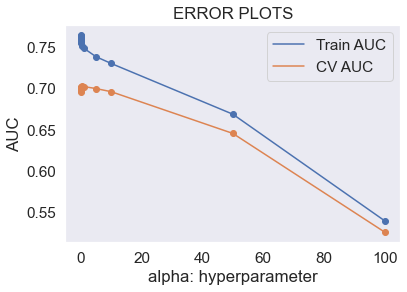

In [94]:
# grid search using simple for loop for different value of alpha[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
# using multinomial naive bayes 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score


#list to store AUC score for different hyperparameter
train_auc = []
cv_auc = []

alpha= [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
for i in alpha:
    clf = MultinomialNB(alpha=i, fit_prior=False, class_prior=[0.5,0.5])
    clf.fit(X_tr,y_train)
    
    #predicting the probability score for train and cross validate set 
    y_train_proba=clf.predict_proba(X_tr)
    y_CV_proba=clf.predict_proba(X_cr)
    
    #storing the hyperparameter
    train_auc.append(roc_auc_score(y_train,y_train_proba[:,1]))
    cv_auc.append(roc_auc_score(y_cv,y_CV_proba[:,1]))

    
    
plt.plot(alpha,train_auc,label='Train AUC')
plt.plot(alpha,cv_auc,label='CV AUC')

plt.scatter(alpha, train_auc)
plt.scatter(alpha, cv_auc )

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
    
    


- At alpha(smoothing parameter)= 1 we get high AUC for both train and CV set 
- at alpah =100 we get low AUC for both set thus underfitting 

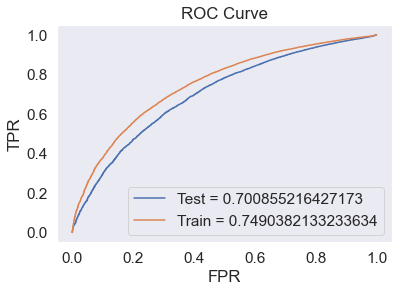

In [95]:
from sklearn import metrics

clf = MultinomialNB(alpha=1, fit_prior=False, class_prior=[0.5,0.5])
clf.fit(X_tr,y_train)
    
#predicting the probability score for train and cross validate set 
y_test_proba=clf.predict_proba(X_te)
y_train_proba=clf.predict_proba(X_tr)
test_AUC_score_bow=roc_auc_score(y_test,y_test_proba[:,1])
train_AUC_score_bow=roc_auc_score(y_train,y_train_proba[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_proba[:,1], pos_label=1)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train,y_train_proba[:,1], pos_label=1)

plt.plot(fpr,tpr,label='Test = '+str(test_AUC_score_bow))
plt.plot(fpr1,tpr1,label='Train = '+str(train_AUC_score_bow))
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid()
plt.show()

# Confusion matrix 

In [96]:
from sklearn.metrics import confusion_matrix
y_test_ped=clf.predict(X_te)
conf_matrix=confusion_matrix(y_test,y_test_ped,labels=[1,0])


Text(0.5, 1.0, 'Cnfusion Matrix')

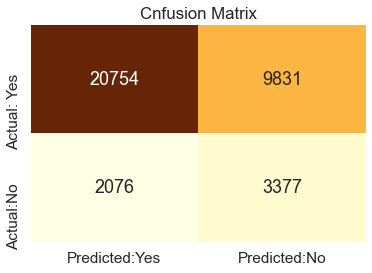

In [97]:
con=pd.DataFrame(conf_matrix,index=['Actual: Yes',"Actual:No"],columns=['Predicted:Yes','Predicted:No'])
sns.set(font_scale=1.4)
sns.heatmap(con,annot=True,cmap="YlOrBr",cbar=False,fmt='g',annot_kws={"size": 18})
plt.title('Cnfusion Matrix')

# Top 20 feature 

In [98]:
clf = MultinomialNB(alpha=1, fit_prior=False, class_prior=[0.5,0.5])
clf.fit(X_tr,y_train)

feature_log_proba=clf.feature_log_prob_


#probaility of feature (likelihood probability)
feature_log_proba_positive=feature_log_proba[1]
feature_log_proba_negative=feature_log_proba[0]


# storing the indices of sorted array and reversing using slicing method
indices_feature_log_proba_positive=feature_log_proba_positive.argsort()[::-1]

indices_feature_log_proba_negative=feature_log_proba_negative.argsort()[::-1]

l_positive=[]
for i in indices_feature_log_proba_positive[:20]:
    l_positive.append(feature_name[i])

l_negative=[]
for j in indices_feature_log_proba_negative[:20]:
    l_negative.append(feature_name[j])

## Top 20 feature for positive class

In [99]:
print(l_positive)

['students', 'school', 'learning', 'classroom', 'not', 'learn', 'help', 'students', 'need', 'students need', 'many', 'nannan', 'reading', 'work', 'need', 'use', 'love', 'day', 'able', 'come']


## Top 20 feature for positive class

In [100]:
print(l_negative)

['students', 'school', 'learning', 'classroom', 'not', 'learn', 'students', 'help', 'need', 'students need', 'nannan', 'many', 'need', 'work', 'come', 'love', 'materials', 'reading', 'skills', 'able']


#  SET 2: Using TFIDF

In [101]:
#storing the feature obtain by TFIDF
feature_name_tfidf=[]

# TFIDF of  preprocessed_essays

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)


#bag of word 
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['preprocessed_essays'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape,y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)


#adding feature name to feature name list
feature_name_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(49021, 5000) (49021,)
(24146, 5000) (24146,)
(36038, 5000) (36038,)


# TFIDF of preprocessed_titles

In [103]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['preprocessed_titles'].values) #fitting on train set 

x_train_title_tfidf=vectorizer.transform(X_train['preprocessed_titles'].values) # transforming train set 
X_cv_title_tfidf=vectorizer.transform(X_cv['preprocessed_titles'].values)  # transforming cross validation set 
X_test_title_tfidf=vectorizer.transform(X_test['preprocessed_titles'].values) # transforming test test 


print(X_cv_title_tfidf.shape)
print(X_cv_title_tfidf.shape)
print(X_test_title_tfidf.shape)


#adding feature name to feature name list
feature_name_tfidf.extend(vectorizer.get_feature_names())

(24146, 3423)
(24146, 3423)
(36038, 3423)


# TFIDF of preprocessed_resource_summary

In [104]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer.fit(X_train['preprocessed_resource_summary'].values) #fitting on train set 

x_train_summ_tfidf=vectorizer.transform(X_train['preprocessed_resource_summary'].values) # transforming train set 
X_cv_summ_tfidf=vectorizer.transform(X_cv['preprocessed_resource_summary'].values)  # transforming cross validation set 
X_test_summ_tfidf=vectorizer.transform(X_test['preprocessed_resource_summary'].values) # transforming test test 


print(X_cv_summ_tfidf.shape)
print(X_cv_summ_tfidf.shape)
print(X_test_summ_tfidf.shape)



#adding feature name to feature name list
feature_name_tfidf.extend(vectorizer.get_feature_names())

(24146, 5000)
(24146, 5000)
(36038, 5000)


In [105]:
# putting tfidf vector in place of bow vector in previously calculated feature list
# and using already existing one hot encoded vectors name in the feature list 
feature_name[:len(feature_name_tfidf)]=feature_name_tfidf


# Concatinating all the features

In [106]:

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf,x_train_title_tfidf,x_train_summ_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm.reshape(-1,1),\
               X_train_number_norm.reshape(-1,1),X_train_quantity_norm.reshape(-1,1),X_train_subcategories_ohe,X_train_categories_ohe,X_train['number_present'].values.reshape(-1,1))).tocsr()


X_cr = hstack((X_cv_essay_tfidf,X_cv_title_tfidf,X_cv_summ_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm.reshape(-1,1),\
              X_cv_number_norm.reshape(-1,1),X_cv_quantity_norm.reshape(-1,1),X_cv_subcategories_ohe,X_cv_categories_ohe,X_cv['number_present'].values.reshape(-1,1))).tocsr()



X_te = hstack((X_test_essay_tfidf,X_test_title_tfidf,X_test_summ_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm.reshape(-1,1),\
              X_test_number_norm.reshape(-1,1),X_test_quantity_norm.reshape(-1,1),X_test_subcategories_ohe,X_test_categories_ohe,X_test['number_present'].values.reshape(-1,1))).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49021, 13909) (49021,)
(24146, 13909) (24146,)
(36038, 13909) (36038,)


# Hyperparameter tunning 

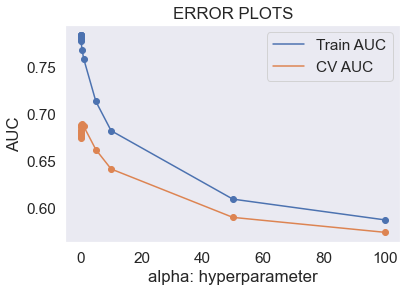

In [107]:
# grid search using simple for loop for different value of alpha[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
# using multinomial naive bayes 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score


#list to store AUC score for different hyperparameter
train_auc = []
cv_auc = []

alpha= [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
for i in alpha:
    clf = MultinomialNB(alpha=i, fit_prior=False, class_prior=[0.5,0.5])
    clf.fit(X_tr,y_train)
    
    #predicting the probability score for train and cross validate set 
    y_train_proba=clf.predict_proba(X_tr)
    y_CV_proba=clf.predict_proba(X_cr)
    
    #storing the hyperparameter
    train_auc.append(roc_auc_score(y_train,y_train_proba[:,1]))
    cv_auc.append(roc_auc_score(y_cv,y_CV_proba[:,1]))

    
    
plt.plot(alpha,train_auc,label='Train AUC')
plt.plot(alpha,cv_auc,label='CV AUC')

plt.scatter(alpha, train_auc)
plt.scatter(alpha, cv_auc )

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
    
    

- At alpha(smoothing parameter)= 1 we get high AUC for both train and CV set 
- at alpah =100 we get low AUC for both set thus underfitting 

# Performing Naive Bayes

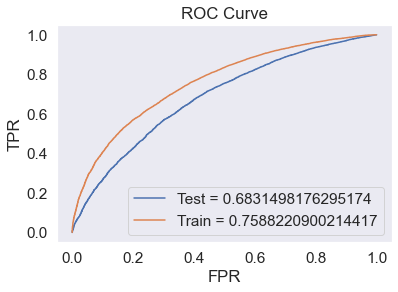

In [108]:
from sklearn import metrics
# for roc curve 



clf = MultinomialNB(alpha=1, fit_prior=False, class_prior=[0.5,0.5])
clf.fit(X_tr,y_train)
    
#predicting the probability score for train and cross validate set 
y_test_proba=clf.predict_proba(X_te)
y_train_proba=clf.predict_proba(X_tr)
test_AUC_score_tfidf=roc_auc_score(y_test,y_test_proba[:,1])
train_AUC_score_tfidf=roc_auc_score(y_train,y_train_proba[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_proba[:,1], pos_label=1)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train,y_train_proba[:,1], pos_label=1)

plt.plot(fpr,tpr,label='Test = '+str(test_AUC_score_tfidf))
plt.plot(fpr1,tpr1,label='Train = '+str(train_AUC_score_tfidf))
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid()
plt.show()

# Confusion matrix

Text(0.5, 1.0, 'Cnfusion Matrix')

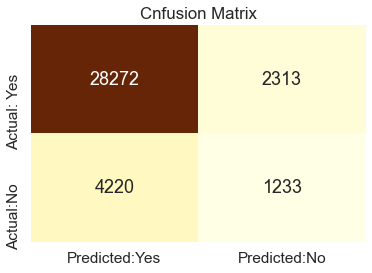

In [109]:
from sklearn.metrics import confusion_matrix
clf = MultinomialNB(alpha=1, fit_prior=True, class_prior=None)
clf.fit(X_tr,y_train)

y_test_ped=clf.predict(X_te)
conf_matrix=confusion_matrix(y_test,y_test_ped,labels=[1,0])
con=pd.DataFrame(conf_matrix,index=['Actual: Yes',"Actual:No"],columns=['Predicted:Yes','Predicted:No'])
sns.set(font_scale=1.4)
sns.heatmap(con,annot=True,cmap="YlOrBr",cbar=False,fmt='g',annot_kws={"size": 18})
plt.title('Cnfusion Matrix')


# Top 20 feature using tfidf

In [110]:
clf = MultinomialNB(alpha=1, fit_prior=False, class_prior=[0.5,0.5])
clf.fit(X_tr,y_train)

feature_log_proba=clf.feature_log_prob_


#probaility of feature (likelihood probability)
feature_log_proba_positive=feature_log_proba[1]
feature_log_proba_negative=feature_log_proba[0]


# storing the indices of sorted array and reversing using slicing method
indices_feature_log_proba_positive=feature_log_proba_positive.argsort()[::-1]

indices_feature_log_proba_negative=feature_log_proba_negative.argsort()[::-1]

l_positive=[]
for i in indices_feature_log_proba_positive[:20]:
    l_positive.append(feature_name[i])

l_negative=[]
for j in indices_feature_log_proba_negative[:20]:
    l_negative.append(feature_name[j])

## Top 20 feature for positive class

In [111]:
print(l_positive)

['mrs', 'grades_prek_2', 'ms', 'grades_3_5', 'other_visualarts', 'grades_6_8', 'appliedsciences_college_careerprep', 'performingarts_socialsciences', 'ca', 'parentinvolvement_specialneeds', 'students', 'grades_9_12', 'mr', 'music_specialneeds', 'gym_fitness_performingarts', 'gym_fitness_teamsports', 'ny', 'tx', 'health_lifescience_performingarts', 'fl']


## Top 20 feature for negative class

In [112]:
print(l_negative)

['mrs', 'grades_prek_2', 'ms', 'grades_3_5', 'other_visualarts', 'performingarts_socialsciences', 'grades_6_8', 'ca', 'students', 'parentinvolvement_specialneeds', 'grades_9_12', 'mr', 'appliedsciences_college_careerprep', 'music_specialneeds', 'tx', 'gym_fitness_performingarts', 'gym_fitness_teamsports', 'fl', 'ny', 'health_wellness_music']


In [113]:
# from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer","Model", "Hyper parameter","AUC"]

x.add_row(['BOW','MultinomialNB',1,test_AUC_score_bow])
x.add_row(['TFIDF','MultinomialNB',1,test_AUC_score_tfidf])
print('Tabel')
print(x)

Tabel
+------------+---------------+-----------------+--------------------+
| Vectorizer |     Model     | Hyper parameter |        AUC         |
+------------+---------------+-----------------+--------------------+
|    BOW     | MultinomialNB |        1        | 0.700855216427173  |
|   TFIDF    | MultinomialNB |        1        | 0.6831498176295174 |
+------------+---------------+-----------------+--------------------+


we are getting higher accuracy with BOW (bag of word) vectorizer